In [5]:
from argparse import ArgumentParser
from pathlib import Path
import pickle

import torch
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
folder = Path("/home/mephody_bro/apps/face-evaluation/figures")
with open(folder / 'scale_uncertainty.pickle', 'rb') as f:
    ue_dict = pickle.load(f)

In [7]:
ues = np.array(ue_dict.values())[:2000]

IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed

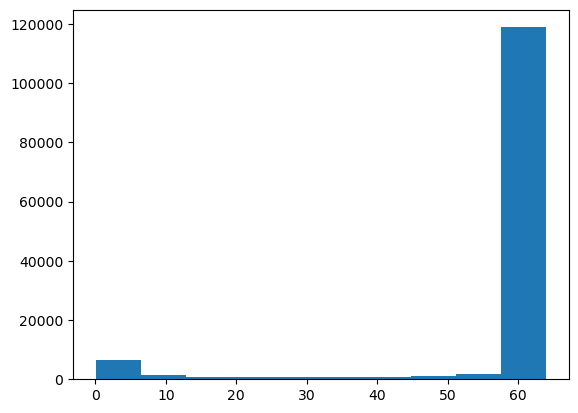

In [31]:
plt.hist(vals)
plt.show()

In [33]:
df = pd.read_csv(folder / 'test1/enroll_templates.csv')

In [47]:
def to_short(row):
    name = f"{str(row.SUBJECT_ID)}/{row.FILENAME.replace('/', '_')}"
    if name in ue_dict:
        return ue_dict[name][0]
    else:
        return None

res = np.array(df.apply(to_short, axis=1))
res

array([63.77761459, 63.97910309, 63.99989319, ..., 63.96593857,
       63.96788025, 63.99725342])

In [48]:
df = pd.read_csv(folder / 'test1/verif_templates.csv')
res2 = np.array(df.apply(to_short, axis=1))

In [54]:
len(res2[res2 is not None])

1

In [58]:
len(res2)
res2 = [v for v in res2 if v is not None]
len(res2)

457519

In [61]:
len(res)
res = [v for v in res if v is not None]
len(res)

11856

In [71]:
res = np.array(res)
res = res[~np.isnan(res)]

In [72]:
res2 = np.array(res2)
res2 = res2[~np.isnan(res2)]
res2

array([62.29417038, 63.99219513,  0.08310413, ..., 63.99928284,
       63.99986267, 63.99970245])

In [75]:
np.mean(res), np.std(res)

(61.25076998400145, 11.631928696905783)

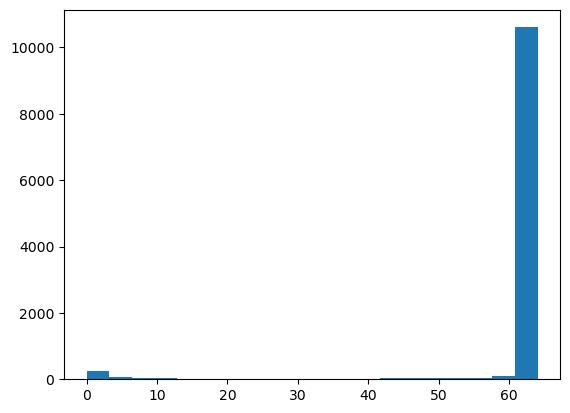

In [80]:
plt.hist(res, bins=20); plt.show()

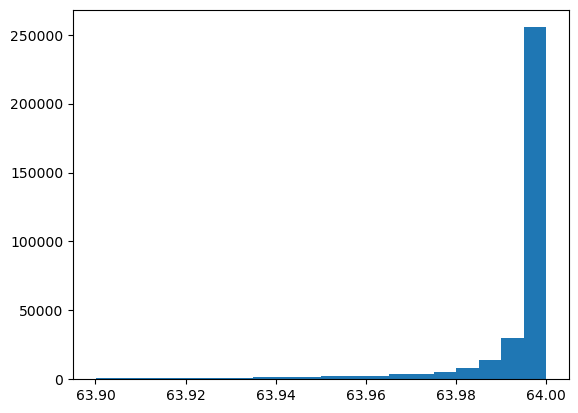

In [86]:
plt.hist(res2[res2>63.9], bins=20); plt.show()

In [99]:
len(res[res > 0])

11387

In [98]:
len(res[res > 63.99])

8745

In [100]:
len(res2[res2 > 0])

432597

In [107]:
len(res2[res2 < 0.5])

7320